In [14]:
import numpy as np
import pandas as pd

In [15]:
df = pd.read_csv('/content/placement.csv')
df.head()

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
0,22,Male,Electronics And Communication,1,8,1,1,1
1,21,Female,Computer Science,0,7,1,1,1
2,22,Female,Information Technology,1,6,0,0,1
3,21,Male,Information Technology,0,8,0,1,1
4,22,Male,Mechanical,0,8,1,0,1


In [16]:
df = df.iloc[:,3:]
df.head()

,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
0,1,8,1,1,1
1,0,7,1,1,1
2,1,6,0,0,1
3,0,8,0,1,1
4,0,8,1,0,1


In [17]:
df.shape

(2966, 5)

In [18]:
df.describe()

,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
count,2966.000000,2966.000000,2966.000000,2966.000000,2966.000000
mean,0.703641,7.073837,0.269049,0.192178,0.552596
std,0.740197,0.967748,0.443540,0.394079,0.497310
min,0.000000,5.000000,0.000000,0.000000,0.000000
25%,0.000000,6.000000,0.000000,0.000000,0.000000
50%,1.000000,7.000000,0.000000,0.000000,1.000000
75%,1.000000,8.000000,1.000000,0.000000,1.000000
max,3.000000,9.000000,1.000000,1.000000,1.000000


In [19]:
import matplotlib.pyplot as plt

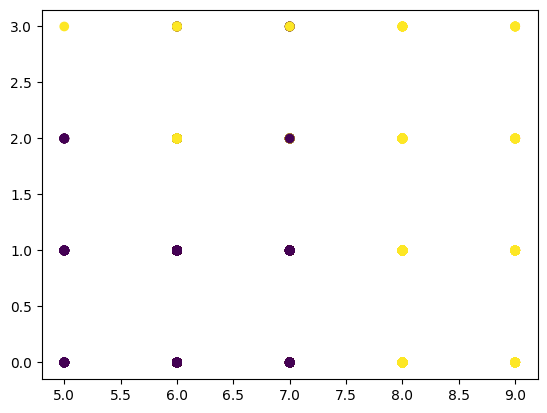

In [20]:
plt.scatter(df['CGPA'],df['Internships'],c=df['PlacedOrNot'])

In [21]:
#we can see that there is a trend that even if cgpa is low if your internships are high then you get placed
# we can use logistic regression here
X = df.drop(columns = 'PlacedOrNot',axis=1)
Y = df['PlacedOrNot']

In [22]:
print(X)
print(Y)

      Internships  CGPA  Hostel  HistoryOfBacklogs
0               1     8       1                  1
1               0     7       1                  1
2               1     6       0                  0
3               0     8       0                  1
4               0     8       1                  0
...           ...   ...     ...                ...
2961            0     7       0                  0
2962            1     7       1                  0
2963            1     7       0                  0
2964            1     7       0                  0
2965            0     8       0                  0

[2966 rows x 4 columns]
0       1
1       1
2       1
3       1
4       1
       ..
2961    0
2962    0
2963    0
2964    0
2965    1
Name: PlacedOrNot, Length: 2966, dtype: int64


In [23]:
from sklearn.model_selection import train_test_split

In [24]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.1,stratify=Y)

In [25]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [26]:
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [27]:
from sklearn.linear_model import LogisticRegression

In [28]:
model = LogisticRegression()

In [29]:
model.fit(x_train,y_train)

LogisticRegression()

In [30]:
model.predict(x_test)

array([0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1])

In [31]:
y_test

,PlacedOrNot
1234,0
1571,1
1880,0
2008,1
1553,0
...,...
1779,1
1870,1
2964,0
1447,0


In [32]:
from sklearn.metrics import accuracy_score

In [38]:
train_accuracy = accuracy_score(model.predict(x_train),y_train)
test_accuracy = accuracy_score(model.predict(x_test),y_test)
print(train_accuracy)
print(test_accuracy)

0.7688272761333833
0.7811447811447811


In [35]:
# #we can use mlextend plot decision boundary to visualize the pattern of model
# from mlxtend.plotting import plot_decision_regions
# plot_decision_regions(x_train, y_train.values, clf=model, legend=2)
# // we can use other models also to check which one works better
from sklearn.linear_model import LinearRegression
model2=LinearRegression()
model2.fit(x_train,y_train)

LinearRegression()

In [36]:
train_accuracy = model2.score(x_train,y_train)
test_accuracy = model2.score(x_test,y_test)
print(train_accuracy)
print(test_accuracy)

0.377480761556897
0.3668629176452035


In [39]:
from sklearn import svm
model3 = svm.SVC()
model3.fit(x_train,y_train)

SVC()

In [40]:
train_accuracy = model3.score(x_train,y_train)
test_accuracy = model3.score(x_test,y_test)
print(train_accuracy)
print(test_accuracy)

0.8475084301236419
0.8552188552188552


In [41]:
# so svm works the best for this problem so we continue with that
import pickle

In [42]:
pickle.dump(model3,open('placement.sav','wb'))